Лабораторная работа 2

Тема: Кластеризация

Вариант 3 (beauty).

Задание.
Разбить заданный датасет на 5 кластеров и на 2 кластера, используя агломеративный иерархический метод и метод к-средних; сравнить результаты.

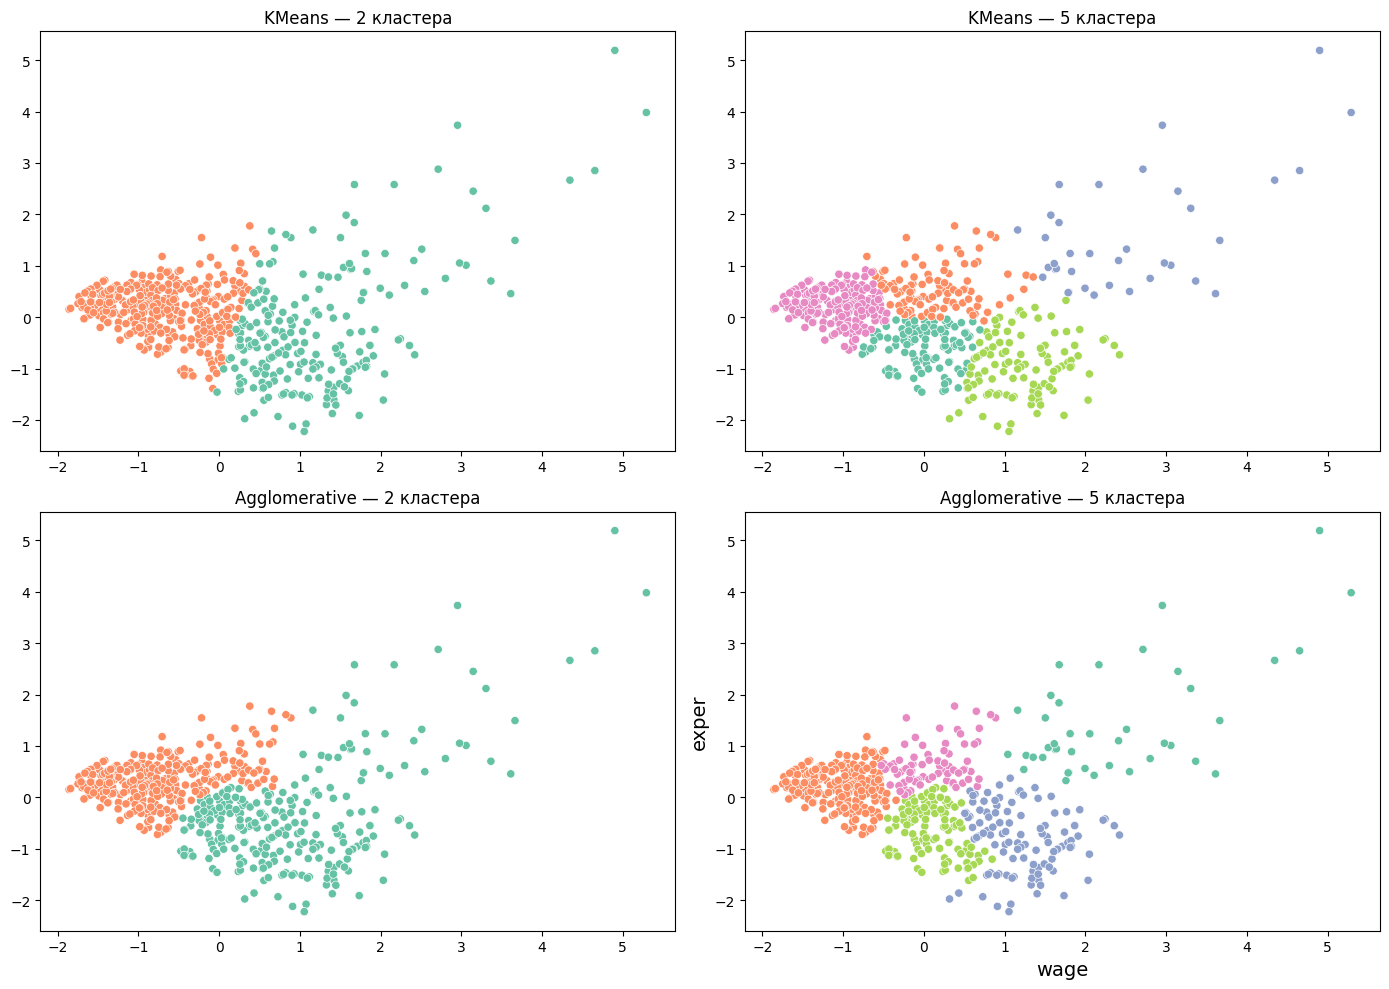

Силуэтные коэффициенты:
('KMeans', 2): 0.4545
('KMeans', 5): 0.3974
('Agglomerative', 2): 0.4082
('Agglomerative', 5): 0.3656

Средние значения признаков по кластерам:

KMeans — 2 кластера:
              wage      exper
cluster                      
0        10.183274  30.192825
1         5.139310  11.344828

KMeans — 5 кластера:
              wage      exper
cluster                      
0         4.964248  23.070796
1         9.302137  14.726496
2        21.199167  26.138889
3         4.049502   7.660633
4         7.973186  35.805310

Agglomerative — 2 кластера:
             wage      exper
cluster                     
0        8.822610  28.852941
1        5.514146   9.640244

Agglomerative — 5 кластера:
              wage      exper
cluster                      
0        20.303902  25.853659
1         4.137479   8.132231
2         8.374035  34.701754
3         9.388023  13.883721
4         5.236325  24.205128


In [110]:
# Импорт необходимых библиотек
import pandas as pd                         # Работа с табличными данными (DataFrame)
import matplotlib.pyplot as plt             # Построение графиков
import seaborn as sns                       # Улучшенные визуализации на основе matplotlib
from sklearn.preprocessing import StandardScaler  # Масштабирование данных (стандартизация)
from sklearn.cluster import KMeans, AgglomerativeClustering  # Методы кластеризации
from sklearn.metrics import silhouette_score        # Оценка качества кластеризации (метрика силуэта)
from sklearn.decomposition import PCA               # Метод главных компонент (для снижения размерности)

# Функция загрузки и предварительной обработки данных
def load_and_prepare_data(filepath):
    # Загружаем только нужные столбцы ('wage' — зарплата, 'exper' — опыт работы), ограничиваем до 600 строк
    df = pd.read_csv(filepath, usecols=['wage', 'exper'])[:600]

    # Стандартизируем признаки, чтобы оба имели одинаковый масштаб
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    return df, X_scaled  # Возвращаем как исходный DataFrame, так и масштабированные данные

# Функция кластеризации и анализа результатов
def cluster_and_analyze(df, X_scaled):
    results = {}  # Словарь для хранения меток кластеров по каждому методу и числу кластеров
    models = {
        "KMeans": KMeans,                    # Метод k-средних
        "Agglomerative": AgglomerativeClustering  # Иерархическая агломеративная кластеризация
    }

    # Перебираем каждый метод и два варианта числа кластеров: 2 и 5
    for method_name, method in models.items():
        for k in [2, 5]:
            # Для KMeans указываем random_state для воспроизводимости
            model = method(n_clusters=k, random_state=40) if method_name == "KMeans" else method(n_clusters=k)
            labels = model.fit_predict(X_scaled)  # Обучаем модель и получаем метки кластеров
            results[(method_name, k)] = labels    # Сохраняем метки по ключу (метод, число кластеров)

    # Понижаем размерность данных до 2D для визуализации (PCA)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Строим 4 графика — по каждому методу и количеству кластеров
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for idx, ((method, k), labels) in enumerate(results.items()):
        ax = axes[idx]
        # Рисуем точки, раскрашенные по принадлежности к кластерам
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", ax=ax, legend=False)
        ax.set_title(f"{method} — {k} кластера")  # Название графика

    plt.xlabel("wage", fontsize=14)
    plt.ylabel("exper", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Выводим силуэтные коэффициенты для оценки качества кластеризации
    print("Силуэтные коэффициенты:")
    for key, labels in results.items():
        score = silhouette_score(X_scaled, labels)
        print(f"{key}: {score:.4f}")

    # Анализируем содержимое кластеров — средние значения признаков по каждому кластеру
    print("\nСредние значения признаков по кластерам:")
    for (method, k), labels in results.items():
        df_clustered = df.copy()
        df_clustered["cluster"] = labels
        means = df_clustered.groupby("cluster").mean()
        print(f"\n{method} — {k} кластера:")
        print(means)

data_filepath = 'beauty.csv'  # Путь к файлу с данными
df, X_scaled = load_and_prepare_data(data_filepath)  # Загружаем и масштабируем данные
cluster_and_analyze(df, X_scaled)  # Выполняем кластеризацию и анализ


Вывод: Был проведён эксперимент по кластеризации заданного датасета с использованием двух методов: агломеративной иерархической кластеризации и метода k-средних. Каждый из методов применялся при двух значениях числа кластеров — 2 и 5. По результатам анализа силуэтных коэффициентов можно сделать вывод, что оба метода достаточно похожи по силуэтным коэффициентам, но у агломеративного подхода, всё же значения ближе к 0, что более предпочтительно. Наблюдаются области с частичным наложением кластеров.